In [14]:
from natasha.extractors import NamesExtractor
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt


In [10]:
gr = []
with open('revizor.csv', "r") as f_obj:
    reader = csv.DictReader(f_obj, delimiter=',')
    for line in reader:
        gr.append([line['Source'], line['Target'], line['Weight']])

In [13]:
G = nx.Graph()
for n in gr:
    G.add_edge(n[0], n[1], weight=n[2])

In [23]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if int(d['weight']) > 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if int(d['weight']) <= 5]

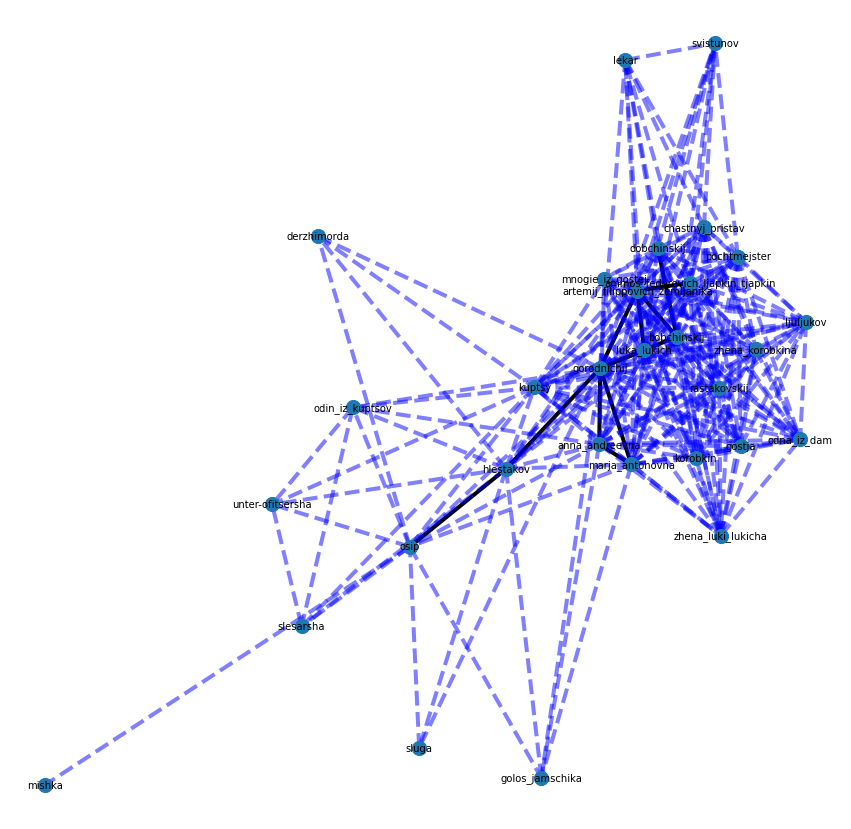

In [26]:
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))

# рисуем вершины 
nx.draw_networkx_nodes(G, pos, node_size=200)
# рисуем популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
# рисуем менее популярные свзяи
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='b', style='dashed')
# подписи
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()
